<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Sammy%20Lee%20-%20Model_Diagnostics_Assignment_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [84]:
##### Your Code Here #####
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [87]:
# Drop any column with NaN

df_1 = df.dropna(axis=1)
df_1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [88]:
# Let's just work on numerical data for now

df_1_numeric = df_1.select_dtypes(include=['number']).copy()

df_1_numeric.dtypes

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [89]:
df_1_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


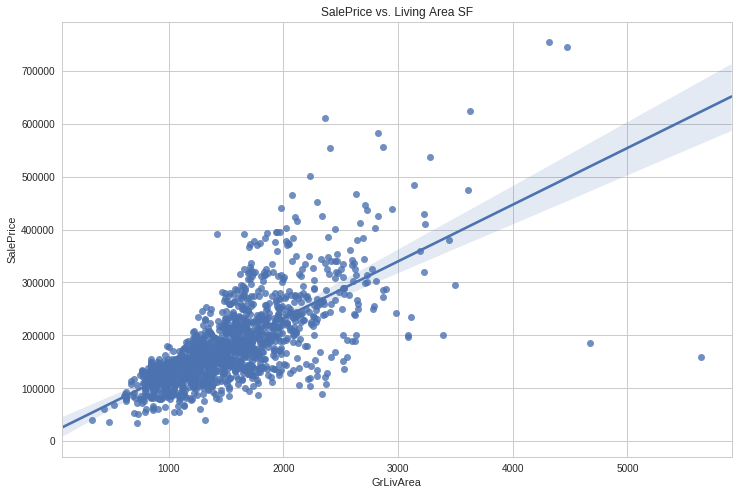

In [90]:
fig, ax = plt.subplots(figsize=(12, 8))

fig = sns.regplot(x="GrLivArea", y="SalePrice", data=df_1_numeric).set_title('SalePrice vs. Living Area SF')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [91]:
df_1_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [92]:
X = df_1_numeric.loc[:,'MSSubClass':'YrSold']
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008


In [93]:
##### Your Code Here #####

# Using statsmodels library

X = df_1_numeric.loc[:,'MSSubClass':'YrSold']
y = df_1_numeric['SalePrice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     195.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:12:00   Log-Likelihood:                -17336.
No. Observations:                1460   AIC:                         3.474e+04
Df Residuals:                    1428   BIC:                         3.490e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.026e+05   1.43e+06      0.352

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

### Answer: The p-values tests with the null hypothesis of zero for each coefficient in the model.  In other words that the coefficient has no effect.  A p-value > 0.05 means we can reject the null hypothesis for that coefficient.  

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [94]:
##### Your Code Here #####


print(df_1_numeric.shape)

df_1_numeric_no_outliers = df_1_numeric[(np.abs(stats.zscore(df_1_numeric)) < 3).all(axis=1)]

print(df_1_numeric_no_outliers.shape)

(1460, 35)
(1037, 35)


In [95]:

X = df_1_numeric_no_outliers.loc[:,'MSSubClass':'YrSold']
y = df_1_numeric_no_outliers['SalePrice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     285.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:12:00   Log-Likelihood:                -11829.
No. Observations:                1037   AIC:                         2.372e+04
Df Residuals:                    1008   BIC:                         2.386e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -124.2470     24.133     -5.148

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Answer: 'BSHalfBath', 'FullBath', GrLivArea', 'GarageArea', 'OpenPorchSF', and 'PoolArea' all changed significantly in magnitude and sometimes direction

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [96]:
##### Your Code Here #####

df_1_numeric_no_outliers['SalePrice_logged'] = np.log(df_1_numeric_no_outliers['SalePrice'])

X = df_1_numeric_no_outliers.loc[:,'MSSubClass':'YrSold']
y = df_1_numeric_no_outliers['SalePrice_logged']



X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:       SalePrice_logged   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     329.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:12:00   Log-Likelihood:                 754.55
No. Observations:                1037   AIC:                            -1451.
Df Residuals:                    1008   BIC:                            -1308.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass       -0.0004      0.000     -3.374

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= s

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [97]:
##### Your Code Here #####
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype='object') 


[2.00899776728085, 1.8236885510032672, 3.2572476125318683, 1.5534871084010702, 4.851971319612753, 2.6016867670671364, inf, inf, inf, inf, inf, inf, inf, inf, 2.2117122074305517, nan, 3.15829397906361, 2.564777928075162, 2.415221083926076, 2405513.178018104, 4.304386241675574, 1.4672603676837805, 5.573798081013541, 4.965354875791834, 1.1752475532717428, 1.295150762684925, 1.3057416837570424, 1.0143833699123317, 1.0544784151515618, nan, 1.0592335094450265, 1.0682611030246634, 1.068532094233074]


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [98]:
# 'BedroomAbvGr' has VIF = 2405513.178018104, so let's remove it and see what happens

X.columns[18:19]

Index(['BedroomAbvGr'], dtype='object')

In [0]:
BedroomAbvGr = df_1_numeric_no_outliers.pop('BedroomAbvGr')


In [100]:
df_1_numeric_no_outliers['SalePrice_logged'] = np.log(df_1_numeric_no_outliers['SalePrice'])

X = df_1_numeric_no_outliers.loc[:,'MSSubClass':'YrSold']
y = df_1_numeric_no_outliers['SalePrice_logged']



X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:       SalePrice_logged   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     341.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:12:00   Log-Likelihood:                 753.77
No. Observations:                1037   AIC:                            -1452.
Df Residuals:                    1009   BIC:                            -1313.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass       -0.0004      0.000     -3.203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value enco

### Perhaps because we only removed one variable, the a couple of the coefficients have gotten slighly smaller, and the standard errors as well, too small to make a real difference in my opinion.

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [101]:
##### Your Code Here #####
X['BedroomAbvGr'] = BedroomAbvGr
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'BedroomAbvGr'], dtype='object')

In [102]:
X.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BedroomAbvGr
MSSubClass,1.000000,-0.483477,0.131643,-0.095627,0.185490,0.137895,-0.090400,0.002508,-0.149617,-0.274797,-0.339760,0.339333,0.134047,0.063662,-0.019985,NaN,0.143289,0.279730,NaN,-0.056608,0.009725,0.010668,-0.069314,0.004296,0.036035,-0.069023,-0.026256,-0.042770,NaN,-0.056278,-0.030918,-0.013282,-0.177161
LotArea,-0.483477,1.000000,0.158481,-0.043467,0.070926,0.030202,0.152210,-0.009940,0.085397,0.267667,0.375473,0.102452,-0.067075,0.380131,0.071510,NaN,0.200380,0.072580,NaN,0.395699,0.278939,0.270434,0.293977,0.150828,0.095218,-0.025751,0.008262,0.048081,NaN,0.037530,0.016021,-0.004842,0.392577
OverallQual,0.131643,0.158481,1.000000,-0.190789,0.642577,0.581585,0.166454,-0.146552,0.316071,0.523870,0.457037,0.304162,0.025435,0.632830,0.094155,NaN,0.653273,0.259877,NaN,0.487923,0.365215,0.626868,0.570435,0.255150,0.356615,-0.166951,-0.002155,-0.027637,NaN,-0.062950,0.085481,-0.014011,0.171059
OverallCond,-0.095627,-0.043467,-0.190789,1.000000,-0.424427,-0.030859,0.000414,0.068750,-0.158718,-0.170074,-0.117575,-0.064025,-0.020955,-0.149557,0.013411,NaN,-0.266450,-0.071773,NaN,-0.097954,-0.069063,-0.227341,-0.183297,-0.044829,-0.106218,0.122017,-0.016333,0.094227,NaN,0.115822,-0.012189,0.062142,-0.028578
YearBuilt,0.185490,0.070926,0.642577,-0.424427,1.000000,0.672780,0.199632,-0.078524,0.193291,0.432141,0.306904,0.135568,0.040982,0.360524,0.172040,NaN,0.612447,0.256869,NaN,0.237266,0.163017,0.596925,0.525951,0.253343,0.307298,-0.412251,0.031794,-0.094751,NaN,-0.096588,0.016547,-0.020563,0.044064
YearRemodAdd,0.137895,0.030202,0.581585,-0.030859,0.672780,1.000000,0.073489,-0.142752,0.228390,0.318567,0.269737,0.173313,0.026387,0.367769,0.120771,NaN,0.543316,0.209081,NaN,0.272271,0.105670,0.481562,0.412601,0.211931,0.304193,-0.213251,0.029782,-0.047480,NaN,-0.079128,0.017881,0.018981,0.028389
BsmtFinSF1,-0.090400,0.152210,0.166454,0.000414,0.199632,0.073489,1.000000,0.007720,-0.600276,0.421802,0.366929,-0.182704,-0.062913,0.105164,0.699965,NaN,0.048272,-0.061035,NaN,0.005938,0.183442,0.188920,0.246676,0.193449,0.045088,-0.104031,-0.029664,0.051755,NaN,-0.008931,-0.016328,0.054809,-0.057690
BsmtFinSF2,0.002508,-0.009940,-0.146552,0.068750,-0.078524,-0.142752,0.007720,1.000000,-0.186256,-0.001370,-0.019523,-0.080772,-0.015090,-0.091009,0.129532,NaN,-0.128129,-0.055502,NaN,-0.086495,-0.041797,-0.082962,-0.041504,0.046875,-0.095118,0.001168,-0.007630,0.030404,NaN,-0.015161,-0.010534,0.016048,0.018050
BsmtUnfSF,-0.149617,0.085397,0.316071,-0.158718,0.193291,0.228390,-0.600276,-0.186256,1.000000,0.453850,0.360172,-0.045692,-0.013150,0.229598,-0.467473,NaN,0.285213,-0.075538,NaN,0.219027,0.070247,0.238375,0.190015,0.009514,0.153492,-0.019751,0.052032,-0.014660,NaN,-0.069639,0.059869,-0.056035,0.110124
TotalBsmtSF,-0.274797,0.267667,0.523870,-0.170074,0.432141,0.318567,0.421802,-0.001370,0.453850,1.000000,0.825799,-0.274330,-0.088825,0.366116,0.265857,NaN,0.359519,-0.167705,NaN,0.243716,0.278391,0.471717,0.488624,0.237231,0.209452,-0.139156,0.025797,0.047133,NaN,-0.094192,0.049242,-0.000581,0.067371


### Answer: Yes, infact the VIF method identified 'BedAbvGr', which had a very high (.68) correlation with 'TotRmsAbvGrd'.  

## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [103]:
##### Your Code Here #####

### 'GrLivArea' and '2ndFlrSF' have a correlation coef of .69 so I'm going to remove '2ndFlrSF' and see if the standard error improve

SecondFlrSF = X.pop('2ndFlrSF')
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BedroomAbvGr
0,60,8450,7,5,2003,2003,706,0,150,856,856,0,1710,1,0,2,1,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,3
2,60,11250,7,5,2001,2002,486,0,434,920,920,0,1786,1,0,2,1,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,3
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,0,2198,1,0,2,1,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,4
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,1694,1,0,2,0,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,3
10,20,11200,5,5,1965,1965,906,0,134,1040,1040,0,1040,1,0,1,0,1,5,0,1,384,0,0,0,0,0,0,0,2,2008,3


In [104]:
BedroomAbvGr = X.pop('BedroomAbvGr')
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,856,0,1710,1,0,2,1,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
2,60,11250,7,5,2001,2002,486,0,434,920,920,0,1786,1,0,2,1,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,0,2198,1,0,2,1,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,1694,1,0,2,0,1,7,1,2,636,255,57,0,0,0,0,0,8,2007
10,20,11200,5,5,1965,1965,906,0,134,1040,1040,0,1040,1,0,1,0,1,5,0,1,384,0,0,0,0,0,0,0,2,2008


### Just as a reminder, the DataFrame X is the all numeric, outliers removed, mulicollinear variables removed DataFrame

In [105]:
df_1_numeric_no_outliers['SalePrice_logged'] = np.log(df_1_numeric_no_outliers['SalePrice'])

X 
y = df_1_numeric_no_outliers['SalePrice_logged']



X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:       SalePrice_logged   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     341.2
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:12:01   Log-Likelihood:                 753.77
No. Observations:                1037   AIC:                            -1452.
Df Residuals:                    1009   BIC:                            -1313.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass       -0.0004      0.000     -3.203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Answer: There's definitely an improvement in the standard error for 'GrLivArea' which was highly correlated with '2ndflrSF'.  And one of the p-values got small enough to be considered significant

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [106]:
##### Your Code Here #####

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       SalePrice_logged   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 5.057e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:12:01   Log-Likelihood:                 753.77
No. Observations:                1037   AIC:                            -1452.
Df Residuals:                    1009   BIC:                            -1313.
Df Model:                          27                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass       -0.0004      0.000     -3.287

### Answer: The standard errors decreased on a lot of them, but for some coefficients the SE's actually increased

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [107]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,856,0,1710,1,0,2,1,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
2,60,11250,7,5,2001,2002,486,0,434,920,920,0,1786,1,0,2,1,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,0,2198,1,0,2,1,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,1694,1,0,2,0,1,7,1,2,636,255,57,0,0,0,0,0,8,2007
10,20,11200,5,5,1965,1965,906,0,134,1040,1040,0,1040,1,0,1,0,1,5,0,1,384,0,0,0,0,0,0,0,2,2008


In [108]:
df_1_numeric_no_outliers.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_logged
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216
6,7,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000,12.634603
10,11,20,11200,5,5,1965,1965,906,0,134,1040,1040,0,0,1040,1,0,1,0,1,5,0,1,384,0,0,0,0,0,0,0,2,2008,129500,11.771436


In [0]:
X['SalePrice_logged'] = df_1_numeric_no_outliers['SalePrice_logged']

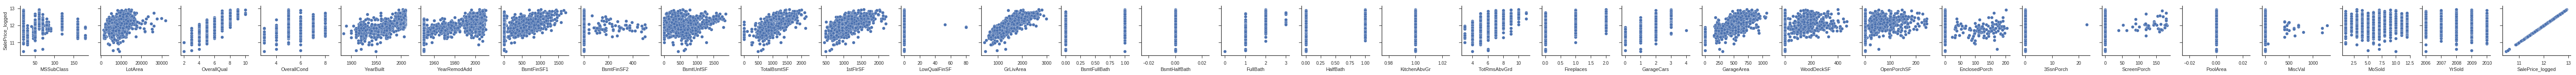

In [110]:
##### Your Code Here #####
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
# X_columns = X.columns.drop(['price', 'ln_price'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=X, y_vars=['SalePrice_logged'], x_vars=X.columns)

### Answer: 'TotalBsmtSF', 'BsmtUnfSF', '1stFlrSF', and 'GrLivArea', and 'Lot Area' look like they could be good for polynomic transformations

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [111]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_logged
0,60,8450,7,5,2003,2003,706,0,150,856,856,0,1710,1,0,2,1,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
2,60,11250,7,5,2001,2002,486,0,434,920,920,0,1786,1,0,2,1,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,0,2198,1,0,2,1,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,1694,1,0,2,0,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,12.634603
10,20,11200,5,5,1965,1965,906,0,134,1040,1040,0,1040,1,0,1,0,1,5,0,1,384,0,0,0,0,0,0,0,2,2008,11.771436


In [112]:
y.head()

0     12.247694
2     12.317167
4     12.429216
6     12.634603
10    11.771436
Name: SalePrice_logged, dtype: float64

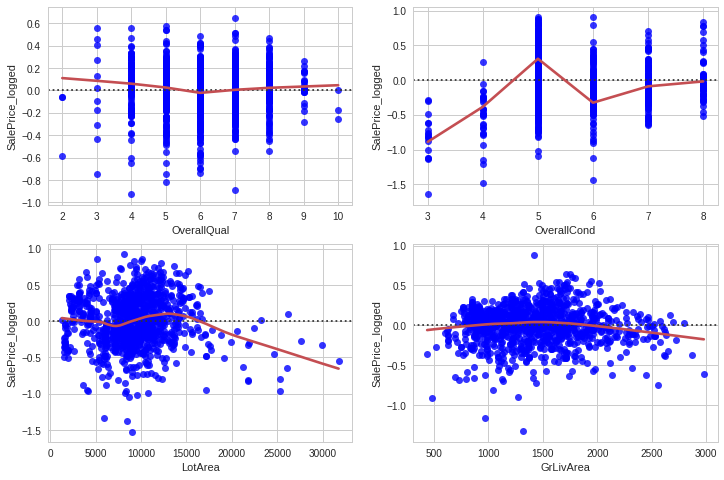

In [113]:
##### Your Code Here #####

sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
sns.residplot(X['OverallQual'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['OverallCond'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['LotArea'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['GrLivArea'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

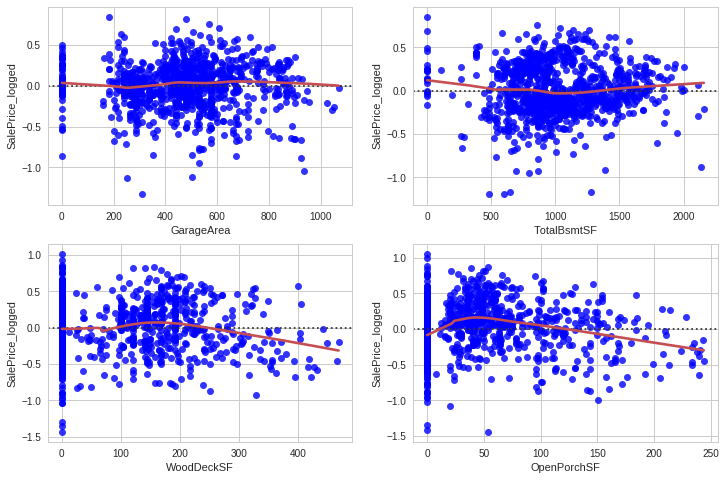

In [114]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
sns.residplot(X['GarageArea'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['TotalBsmtSF'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['WoodDeckSF'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['OpenPorchSF'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

In [115]:
X['LotArea_squared'] = X['LotArea']**2
X['GrLivArea_squared'] = X['GrLivArea']**2

X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_logged,LotArea_squared,GrLivArea_squared
0,60,8450,7,5,2003,2003,706,0,150,856,856,0,1710,1,0,2,1,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,71402500,2924100
2,60,11250,7,5,2001,2002,486,0,434,920,920,0,1786,1,0,2,1,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167,126562500,3189796
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,0,2198,1,0,2,1,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216,203347600,4831204
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,1694,1,0,2,0,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,12.634603,101687056,2869636
10,20,11200,5,5,1965,1965,906,0,134,1040,1040,0,1040,1,0,1,0,1,5,0,1,384,0,0,0,0,0,0,0,2,2008,11.771436,125440000,1081600


## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [116]:
X.shape

(1037, 34)

In [117]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice_logged', 'LotArea_squared', 'GrLivArea_squared'], dtype='object')

In [118]:
##### Your Code Here #####

y = X['SalePrice_logged']


X = X[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'LotArea_squared', 'GrLivArea_squared']]



X = sm.add_constant(X)


model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       SalePrice_logged   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 4.732e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:14:40   Log-Likelihood:                 759.59
No. Observations:                1037   AIC:                            -1459.
Df Residuals:                    1007   BIC:                            -1311.
Df Model:                          29                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MSSubClass           -0.0002      0.00

### Answer: I wouldn't say that the coefficients of this most advanced model match my intuition better than the first one, and furthermore most of my coefficients stayed pretty much the same.  The biggest jump in a reduction of standard errors came from getting rid of outliers.